Import the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Augment the data

In [2]:
train = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)

Loading and augmentation of given data

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ruVWq-upAEIpwyjrYMpdqlosZ4JnX5RXtcSn70MT9ecX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmimageclassification-donotdelete-pr-dljypkqhychmlp'
object_key = 'Dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
fpath = unzip.namelist()
for i in fpath:
    unzip.extract(i)

In [5]:
pwd

'/home/wsuser/work'

In [6]:
import os
filename = os.listdir('/home/wsuser/work/Dataset/train')

In [7]:
import os
filename2 = os.listdir('/home/wsuser/work/Dataset/test')

In [8]:
A_train = train.flow_from_directory('/home/wsuser/work/Dataset/train', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')
A_test = test.flow_from_directory('/home/wsuser/work/Dataset/test', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [9]:
print(A_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [10]:
print(A_test.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


Import Keras library

In [11]:
model = Sequential()

Add 1st Convolution Layer and Pooling  layer

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add 2nd Convolution Layer and Pooling layer

In [13]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add Flatten layer

In [14]:
model.add(Flatten())

Add dense layers

In [15]:
model.add(Dense(units=512,activation='relu'))

In [16]:
model.add(Dense(units=6,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

Compile the model

In [18]:
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')

Train the model

In [19]:
model.fit(A_train,steps_per_epoch = 594/3,epochs=25,validation_data=A_test,validation_steps=len(A_test))

Epoch 1/25
198/198 [==============================] - 13s 61ms/step - loss: 1.2947 - accuracy: 0.4983 - val_loss: 0.8564 - val_accuracy: 0.6667
Epoch 2/25
198/198 [==============================] - 12s 60ms/step - loss: 0.5856 - accuracy: 0.7407 - val_loss: 0.7670 - val_accuracy: 0.7667
Epoch 3/25
198/198 [==============================] - 12s 61ms/step - loss: 0.4245 - accuracy: 0.8502 - val_loss: 0.4064 - val_accuracy: 0.8667
Epoch 4/25
198/198 [==============================] - 12s 60ms/step - loss: 0.2823 - accuracy: 0.9074 - val_loss: 0.4233 - val_accuracy: 0.8333
Epoch 5/25
198/198 [==============================] - 12s 60ms/step - loss: 0.2197 - accuracy: 0.9175 - val_loss: 0.3531 - val_accuracy: 0.8667
Epoch 6/25
198/198 [==============================] - 12s 60ms/step - loss: 0.1884 - accuracy: 0.9259 - val_loss: 0.2322 - val_accuracy: 0.9667
Epoch 7/25
198/198 [==============================] - 12s 59ms/step - loss: 0.1547 - accuracy: 0.9495 - val_loss: 0.2573 - val_accuracy:

Save the model

In [20]:
model.save('gesture.h5')

In [21]:
json_model = model.to_json()
with open("model-gesture.json","w") as json_file:
  json_file.write(json_model)

In [22]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ruVWq-upAEIpwyjrYMpdqlosZ4JnX5RXtcSn70MT9ecX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmimageclassification-donotdelete-pr-dljypkqhychmlp'
object_key = 'imagetester.zip'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [23]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_5.read()),'r')
fpath = unzip.namelist()
for i in fpath:
    unzip.extract(i)

In [24]:
import os
filename2 = os.listdir('/home/wsuser/work/Dataset')


In [25]:
ls

4.jpg     gesture.h5            model-gesture.json  test_image2.jpg
Dataset/  gesture_model.tar.gz  model-gesture.tgz   test_image.jpg


Test the model

In [26]:
!pip install watson-machine-learning-client --upgrade

In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                     "apikey":"UmH36wZ05c7Y8sHKX0hT46II80oRbd5YZtuhSGrMbSdv"
}
client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client,'IBMImageClassificationModel')
print("Space uid = ", space_uid)

Space uid =  f2e92fb4-0cc5-4b0f-8513-080137c29b49


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [32]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [33]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [34]:
!tar -zcvf model-gesture.tgz gesture.h5

gesture.h5


In [35]:
ls

4.jpg     gesture.h5          model-gesture.tgz  test_image.jpg
Dataset/  model-gesture.json  test_image2.jpg


In [36]:
model_details = client.repository.store_model(model="model-gesture.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}
                                             )
model_id = client.repository.get_model_id(model_details)

In [37]:
model_id

'997ddf5c-d58e-4cc2-85e3-324254945d3d'

In [38]:
client.repository.download(model_id,'gesture_model.tar.gz')

Successfully saved model content to file: 'gesture_model.tar.gz'


'/home/wsuser/work/gesture_model.tar.gz'

In [39]:
ls

4.jpg     gesture.h5            model-gesture.json  test_image2.jpg
Dataset/  gesture_model.tar.gz  model-gesture.tgz   test_image.jpg


In [31]:
rm gesture_model.tar.gz

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model = load_model('gesture.h5')
img_path= "/home/wsuser/work/4.jpg"

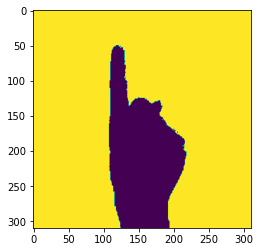

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [42]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [43]:
type(res)

numpy.ndarray

In [44]:
res = np.expand_dims(res,axis=0)

In [45]:
res.shape

(1, 64, 64, 1)

Predict the result

In [46]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

array([1])

In [47]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'1'